In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

# Homework 3

# Data Preparation

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-09-27 12:46:45--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  9.20MB/s    in 0.2s    

2023-09-27 12:46:46 (9.20 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [6]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [7]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [9]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [10]:
df = df.fillna(0)

In [11]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [12]:
features = ["make", "model", "year", "engine_hp", "engine_cylinders", 
            "transmission_type", "vehicle_style", "highway_mpg", "city_mpg"]

In [13]:
df.rename(columns={'msrp': 'price'}, inplace=True)

In [14]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
price                  int64
dtype: object

In [15]:
df_data = df[features+['price']]

In [16]:
df_data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


# Question 1

In [17]:
df['transmission_type'].describe()

count         11914
unique            5
top       AUTOMATIC
freq           8266
Name: transmission_type, dtype: object

In [18]:
df['transmission_type'].mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

automatic is the most frequent

# Question 2

In [20]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [21]:
corr_matrix = df_data[numerical].corr()
print(corr_matrix)

                      year  engine_hp  engine_cylinders  highway_mpg  city_mpg
year              1.000000   0.338714         -0.040708     0.258240  0.198171
engine_hp         0.338714   1.000000          0.774851    -0.415707 -0.424918
engine_cylinders -0.040708   0.774851          1.000000    -0.614541 -0.587306
highway_mpg       0.258240  -0.415707         -0.614541     1.000000  0.886829
city_mpg          0.198171  -0.424918         -0.587306     0.886829  1.000000


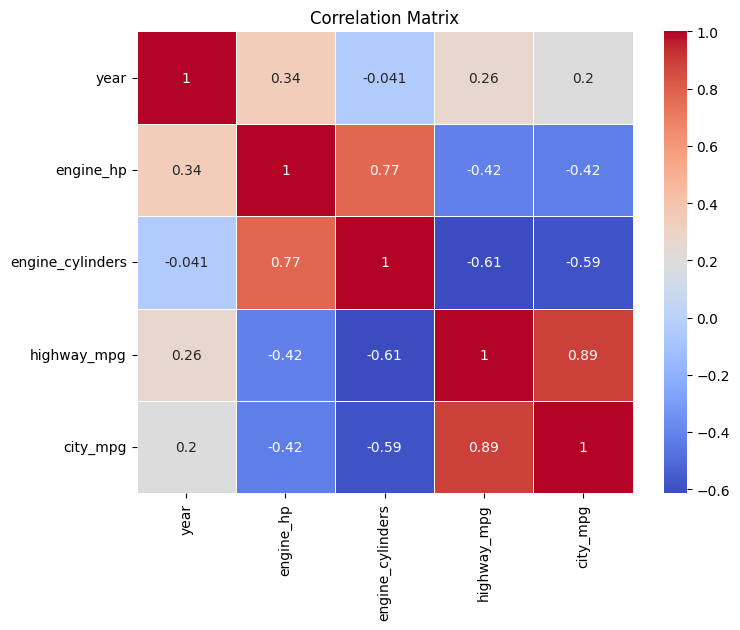

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Highway_mpg and city_mpg are highly correlated at .89

In [23]:
price_mean = df_data['price'].mean()
def above_average(price):
    if price > price_mean:
        return 1
    else:
        return 0

In [24]:
df_data['above_average'] = df_data['price'].apply(above_average)

/var/folders/8l/7m5kpzns2z542lw1gdxzvnbh0000gn/T/ipykernel_5163/2003978724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['above_average'] = df_data['price'].apply(above_average)


In [25]:
df_data['above_average'].head()

0    1
1    1
2    0
3    0
4    0
Name: above_average, dtype: int64

In [26]:
df_full_train, df_test = train_test_split(df_data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [27]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [28]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [29]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['price']
del df_val['price']
del df_test['price']

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

# Question 3

In [37]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9531 entries, 3181 to 7270
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               9531 non-null   object 
 1   model              9531 non-null   object 
 2   year               9531 non-null   int64  
 3   engine_hp          9531 non-null   float64
 4   engine_cylinders   9531 non-null   float64
 5   transmission_type  9531 non-null   object 
 6   vehicle_style      9531 non-null   object 
 7   highway_mpg        9531 non-null   int64  
 8   city_mpg           9531 non-null   int64  
 9   price              9531 non-null   int64  
 10  above_average      9531 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 893.5+ KB


In [38]:
def mutual_info_above_average_score(series):
    return round(mutual_info_score(series, df_full_train.above_average), 2)

In [39]:
mi = df_full_train.apply(mutual_info_above_average_score)
mi.sort_values(ascending=False)

price                0.59
above_average        0.59
model                0.46
engine_hp            0.36
make                 0.24
engine_cylinders     0.12
vehicle_style        0.08
year                 0.07
city_mpg             0.06
highway_mpg          0.04
transmission_type    0.02
dtype: float64

Tramission type has the lowest mutual info score

# Question 4

In [40]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [41]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [42]:
y_pred = model.predict_proba(X_val)[:, 1]

In [43]:
high_price = (y_pred >= 0.5)

In [44]:
(y_val == high_price).mean()

0.9345362987830466

In [45]:
y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


# Question 5

In [56]:
def train_pred(features):
    dv = DictVectorizer(sparse=False)

    train_dict = df_train[features].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[features].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    accuracy = round(accuracy_score(y_val, y_pred), 2)
    return accuracy


In [58]:
full_features = train_pred(features)
print(f"Full feature accuracy {full_features}")
n = len(features)
min_diff = float("inf")
min_feature = ""
for i in range(n):
    reduced_features = train_pred(features[:i] + features[i+1:])
    print(f"Reduced feature {features[i]} accuracy: {reduced_features} full {full_features}")
    diff = abs(full_features-reduced_features)
    if diff < min_diff:
        min_diff = diff
        min_feature = features[i]
print(f"Feature {min_feature} Difference {min_diff}")

Full feature accuracy 0.93
Reduced feature make accuracy: 0.95 full 0.93
Reduced feature model accuracy: 0.92 full 0.93
Reduced feature year accuracy: 0.95 full 0.93
Reduced feature engine_hp accuracy: 0.92 full 0.93
Reduced feature engine_cylinders accuracy: 0.95 full 0.93
Reduced feature transmission_type accuracy: 0.95 full 0.93
Reduced feature vehicle_style accuracy: 0.94 full 0.93
Reduced feature highway_mpg accuracy: 0.94 full 0.93
Reduced feature city_mpg accuracy: 0.95 full 0.93
Feature vehicle_style Difference 0.009999999999999898


# Question 6

In [ ]:
df_data['price'] = np.log1p(df_data['price'])

In [62]:
df_full_train, df_test = train_test_split(df_data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

/var/folders/8l/7m5kpzns2z542lw1gdxzvnbh0000gn/T/ipykernel_5163/2878587585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['price'] = np.log1p(df_data['price'])


In [63]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [86]:
rmse_scores = {}
def linear_train_pred(alpha):
    # dv = DictVectorizer(sparse=False)
    dv = DictVectorizer()

    train_dict = df_train.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model = Ridge(alpha=alpha, solver='sag', random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    # rmse = sqrt(mean_squared_error(y_test, y_pred))
    rmse = mean_squared_error(y_test, y_pred)
    rmse_scores[alpha] = round(rmse, 3)

In [87]:
alphas = [0, 0.01, 0.1, 1, 10]

for alpha in alphas:
    linear_train_pred(alpha)

min_rsme = float("inf")
best_alpha = 0
for alpha, rmse in rmse_scores.items():
    if rmse < min_rsme:
        min_rsme = rmse
        best_alpha = alpha
    print(f'Alpha = {alpha}: RMSE = {rmse}')
print(f"Best alpha {best_alpha} rmse {min_rsme}")

Alpha = 0: RMSE = 2.476
Alpha = 0.01: RMSE = 2.477
Alpha = 0.1: RMSE = 2.475
Alpha = 1: RMSE = 2.45
Alpha = 10: RMSE = 2.363
Best alpha 10 rmse 2.363


In [77]:
rmse_scores

{0: 2.476, 0.01: 2.477, 0.1: 2.475, 1: 2.45, 10: 2.363}